## Requirement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import cv2
import urllib

from IPython.display import Image

from tqdm.notebook import tqdm_notebook

---

## Simple EDA

In [2]:
raw_df = pd.read_csv('./data/raw_data.csv')
raw_df.head()

,id,name,brand_id,brand_name,parent_category_id,parent_category_name,category_id,category_id.1,price,image_url
0,2926,사슴 배냇저고리 세트_Cotton,5,호호당,2.0,의류,25.0,신생아의류,42000,https://hohodangstore.co.kr/web/product/medium...
1,2929,아이 백일 선물 세트,5,호호당,1.0,용품,27.0,기타용품,92000,https://hohodangstore.co.kr/web/product/medium...
2,2930,[카드] 연하장 : New year 2021,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...
3,2931,[카드] 일상 : Thanks and love,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...
4,2932,금줄,5,호호당,1.0,용품,27.0,기타용품,35000,https://hohodangstore.co.kr/web/product/medium...


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405150 entries, 0 to 405149
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    405150 non-null  int64  
 1   name                  404903 non-null  object 
 2   brand_id              405150 non-null  int64  
 3   brand_name            405150 non-null  object 
 4   parent_category_id    390674 non-null  float64
 5   parent_category_name  390674 non-null  object 
 6   category_id           390674 non-null  float64
 7   category_id.1         390674 non-null  object 
 8   price                 405150 non-null  int64  
 9   image_url             405150 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 30.9+ MB


In [4]:
raw_df['parent_category_id'].unique()

array([ 2.,  1.,  3., nan])

In [5]:
print(len(raw_df[raw_df['parent_category_id'] == 1]['category_id'].unique())) # 용품
print(len(raw_df[raw_df['parent_category_id'] == 2]['category_id'].unique())) # 의류
print(len(raw_df[raw_df['parent_category_id'] == 3]['category_id'].unique())) # 잡화

13
13
10


In [6]:
raw_df['temp'] = 1
raw_df.head()

,id,name,brand_id,brand_name,parent_category_id,parent_category_name,category_id,category_id.1,price,image_url,temp
0,2926,사슴 배냇저고리 세트_Cotton,5,호호당,2.0,의류,25.0,신생아의류,42000,https://hohodangstore.co.kr/web/product/medium...,1
1,2929,아이 백일 선물 세트,5,호호당,1.0,용품,27.0,기타용품,92000,https://hohodangstore.co.kr/web/product/medium...,1
2,2930,[카드] 연하장 : New year 2021,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...,1
3,2931,[카드] 일상 : Thanks and love,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...,1
4,2932,금줄,5,호호당,1.0,용품,27.0,기타용품,35000,https://hohodangstore.co.kr/web/product/medium...,1


In [7]:
category_info = raw_df.pivot_table(index=['parent_category_id', 'category_id'], values='temp', aggfunc=np.sum)

<AxesSubplot:xlabel='parent_category_id,category_id'>

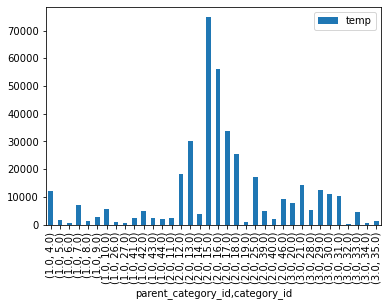

In [8]:
category_info.plot(kind='bar')

- parent category id: 1 = 용품, 2 = 의류, 3 = 잡화
- 확실히 의류 데이터 수가 다른 부모 카테고리에 비해 압도적으로 많음.
- 의류 데이터는 하위 13개의 자식 카테고리를 갖고 있음.

In [9]:
category_info

temp
parent_category_id category_id       
1.0                4.0          12211
                   5.0           1725
                   6.0            713
                   7.0           6922
                   8.0           1313
                   9.0           2609
                   10.0          5449
                   26.0           918
                   27.0           684
                   41.0          2346
                   42.0          4826
                   43.0          2257
                   44.0          2017
2.0                11.0          2314
                   12.0         18194
                   13.0         30204
                   14.0          3963
                   15.0         74737
                   16.0         56107
                   17.0         33899
                   18.0         25572
                   19.0           822
                   25.0         17075
                   39.0          5059
                   40.0          2017
                   46.0          9180
3.0                20.0          7593
                   21.0         14354
                   28.0          5253
                   29.0         12322
                   30.0         11055
                   31.0         10370
                   32.0           347
                   33.0          4463
                   34.0           631
                   35.0          1153

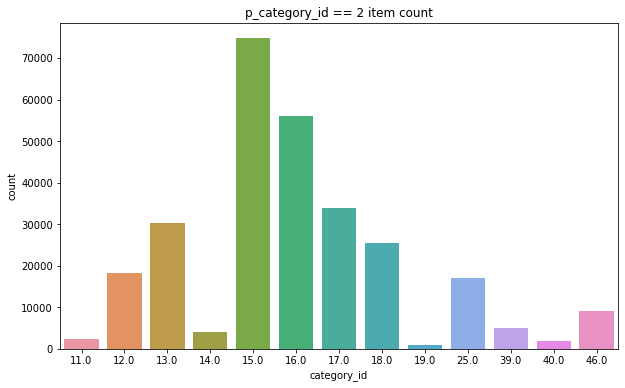

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_df[raw_df['parent_category_id'] == 2], x='category_id')
plt.title('p_category_id == 2 item count')
plt.show()

In [11]:
temp = category_info.reset_index()
temp.head()

,parent_category_id,category_id,temp
0,1.0,4.0,12211
1,1.0,5.0,1725
2,1.0,6.0,713
3,1.0,7.0,6922
4,1.0,8.0,1313


In [12]:
np.mean(temp[temp['parent_category_id'] == 2]['temp'])

21472.53846153846

<AxesSubplot:xlabel='temp'>

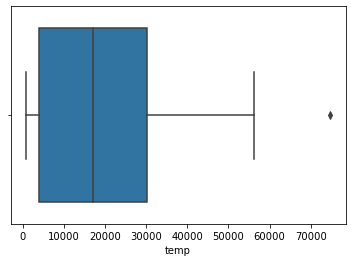

In [13]:
sns.boxplot(data = temp[temp['parent_category_id'] == 2], x = 'temp')

In [14]:
fig = px.box(temp[temp['parent_category_id'] == 2]['temp'])
fig.show()

- iqr 사분위수 1지점 값: 3550개로 세팅.
- category_id 15 16 17 18번 같은 경우는 데이터 건수가 많지만 일단 적은쪽에 맞춰 테스트 진행.
- 의류 데이터 별로 max 3550개로 맞춰서 자르기

- 일단 테스트로 가장 데이터가 많은 parent_category_id = 2, category_id = 15 로 특징 추출 테스트 진행

In [15]:
print(raw_df[raw_df['parent_category_id'] == 2]['parent_category_name'][0])
print(raw_df[raw_df['category_id'] == 15]['category_id.1'].unique()[0])

의류
상의


---

## opencv로 imageurl로부터 image 읽기

In [16]:
raw_df['image_url'][0]

'https://hohodangstore.co.kr/web/product/medium/20200422/3e7803ae7120a444ea3a0b014f973d4f.png'

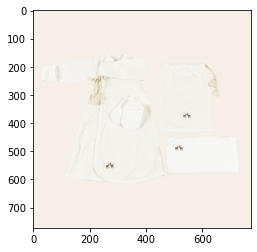

In [17]:
url = raw_df['image_url'][0]

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


In [18]:
req

In [19]:
img.shape

(772, 772, 3)

- 정방형의 경우 -> 바로 resizing

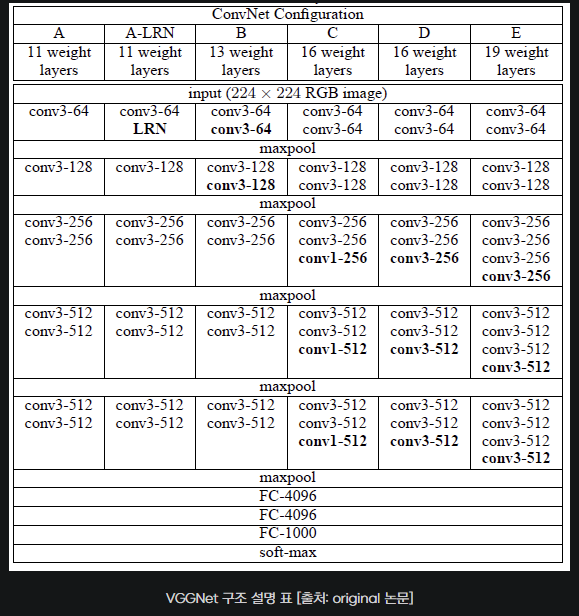

In [20]:
Image("./data/explain1.PNG")

- 위 표에서 D구조가 VGG16 input size 224 x 224 이므로 해당 픽셀에 맞게 resizing

dst shape: (224, 224, 3)


(-0.5, 223.5, 223.5, -0.5)

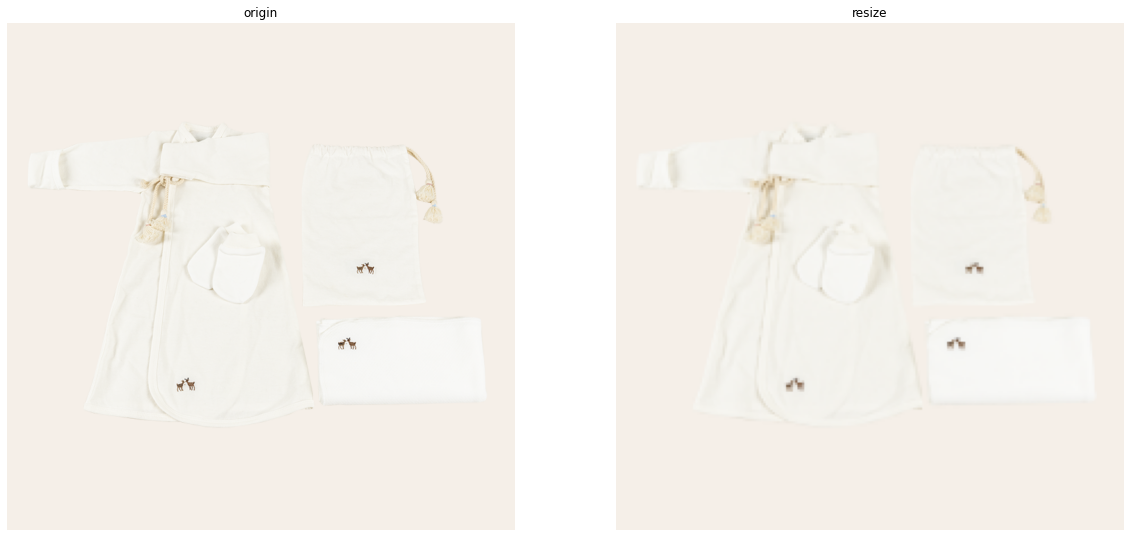

In [21]:
# 이미지 픽셀을 축소하는 것이므로 영역 보간법 사용.

dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
print(f'dst shape: {dst.shape}')
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('origin')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title('resize')
plt.axis('off')

- 픽셀을 줄였을시 한복에 보이는 상세한 자수 모양은 좀 깨지는것 처럼 보인다.

In [23]:
long = []
wide = []
square = []

for i, row in tqdm_notebook(raw_df[:1000].iterrows()):
    try:
        url = row['image_url']
        req = urllib.request.urlopen(url)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        height = img.shape[0]
        width = img.shape[1]

        if width > height:
            wide.append(url)
        elif width < height:
            long.append(url)
        else:
            square.append(url)
    except:
        continue

print(len(long), len(wide), len(square))

0it [00:00, ?it/s]

391 544 34


In [23]:
# long

In [24]:
def compare_image(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('origin')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.title('resize')
    plt.axis('off')

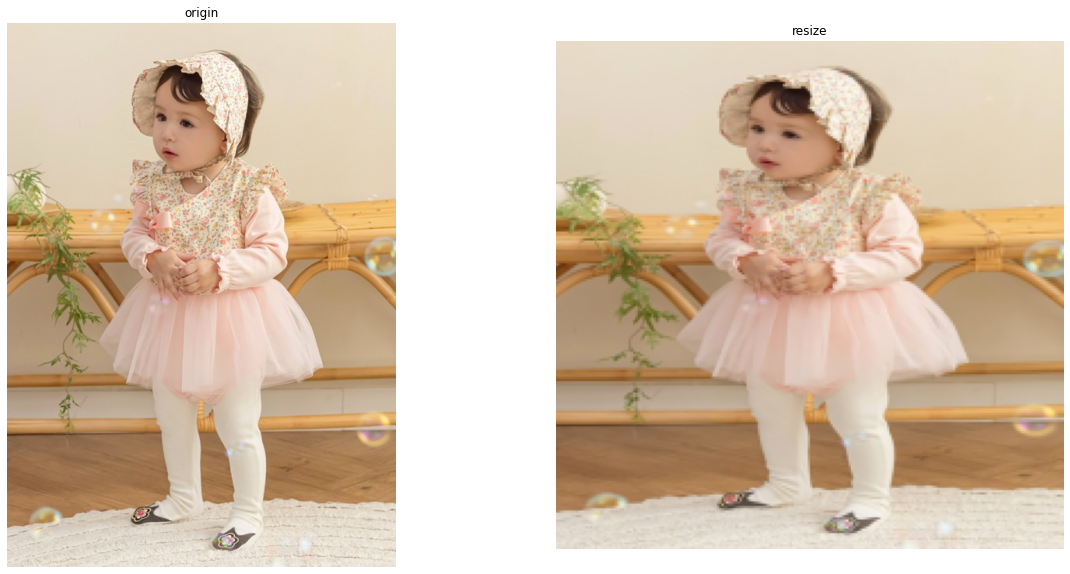

In [25]:
compare_image(long[0])

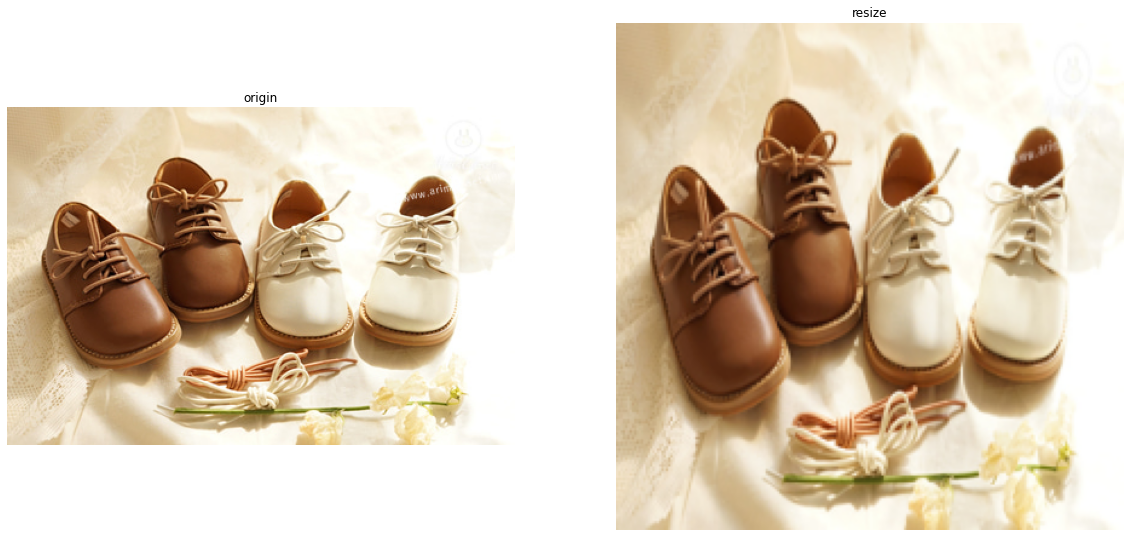

In [26]:
compare_image(wide[0])

### ROI 분리

In [27]:
def resize(img, width, height):
    dst = img
    if width > height:
        print('cut width')
        target = (width-height) // 2
        dst =  img[:height, target: width-target].copy()
    elif width < height:
        print('cut height')
        target = (height-width) // 2
        dst = img[target:height-target, :width].copy()
    return dst

def resize_image_compare(url):
    url = url
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    height = img.shape[0]
    width = img.shape[1]

    origin = img.copy()
    # Resize image
    img = resize(img, width, height)

    dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(origin)
    plt.title('origin')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img)
    plt.title('cut image')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(dst)
    plt.title('resize')
    plt.axis('off')
        

In [28]:
# resize_image_compare(long[0])

In [29]:
# resize_image_compare(wide[0])

In [30]:
# resize_image_compare(square[0])

---

In [31]:
cloth_cat_info = list(raw_df[raw_df['parent_category_id'] == 2]['category_id'].unique())

In [32]:
def get_category_name(df, id):
    return df[df['category_id']==id]['category_id.1'].values[0]

In [33]:
for id in cloth_cat_info:
    print(get_category_name(raw_df, id))

신생아의류
내의/속옷
시즌의류/기타
한복
원피스
상하복/세트
상의
바지
수영복
아우터
치마
패밀리룩
임산부의류


In [34]:
temp = list(raw_df[raw_df['parent_category_id'] == 1]['category_id'].unique())

In [35]:
for id in temp:
    print(get_category_name(raw_df, id))

기타용품
신생아용품
이유/수유용품
생활용품
유아침구
장난감/완구
가구/리빙
외출용품
파티/촬영소품
교구/도서
스킨/바디용품
위생/건강용품
인테리어소품


In [36]:
print(raw_df[raw_df['parent_category_id'] == 1]['category_id'].unique())
print(raw_df[raw_df['parent_category_id'] == 2]['category_id'].unique())
print(raw_df[raw_df['parent_category_id'] == 3]['category_id'].unique())

[27.  8.  7.  5. 10.  4. 42.  9. 44. 41. 26.  6. 43.]
[25. 12. 40. 14. 13. 18. 15. 16. 11. 17. 39. 19. 46.]
[28. 35. 31. 30. 20. 29. 21. 34. 33. 32.]


---

## file resize and save

In [37]:
# list(raw_df[raw_df['category_id'] == 27]['image_url'])

In [38]:
# # total
# # crop_resize

# def crop_image(img, width, height):
#     dst = img
#     if width > height:
#         print('cut width')
#         target = (width-height) // 2
#         dst =  img[:height, target: width-target].copy()
#     elif width < height:
#         print('cut height')
#         target = (height-width) // 2
#         dst = img[target:height-target, :width].copy()
#     return dst

# def convert_image(url):
#     req = urllib.request.urlopen(url)
#     arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#     img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
#     height = img.shape[0]
#     width = img.shape[1]

#     # crop image
#     img = crop_image(img, width, height)

#     dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)

#     return dst
    
# success= 0
# fail = 0

# for i in  tqdm_notebook(range(1, 4)):
#     child_category = list(raw_df[raw_df['parent_category_id'] == i]['category_id'].unique())

#     for id in child_category:
#         image_url_list = list(raw_df[raw_df['category_id'] == id]['image_url'])
        
#         size = len(image_url_list)
        
#         # random shuffling
#         if size >= 3350:
#             rand_choices = np.random.choice(image_url_list, 3350, replace=False) #비복원 추출
#         else:
#             rand_choices = np.random.choice(image_url_list, size, replace=False) #비복원 추출
        
        
#         for url in rand_choices:
#             try:
#                 img = convert_image(url)
#                 #img save
#                 cv2.imwrite(f'C:/Users/sanghui/Desktop/toyproject/DL_Project_5/hsh/data/crop_resize/{i}/{id}')
#                 success += 1
#             except:
#                 fail += 1
#                 continue

# print(success, fail)


In [39]:
# only clothes
# crop_resize

def crop_image(img, width, height):
    dst = img
    if width > height:
        print('cut width')
        target = (width-height) // 2
        dst =  img[:height, target: width-target].copy()
    elif width < height:
        print('cut height')
        target = (height-width) // 2
        dst = img[target:height-target, :width].copy()
    return dst

def convert_image(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
        
    height = img.shape[0]
    width = img.shape[1]

    # crop image
    img = crop_image(img, width, height)

    dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)

    return dst

def padding_image(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    back_color = tuple([int(x) for x in img[1,1]])
    h, w = img.shape[:2]
    diff = abs(h - w) // 2

    if h > w:
        h_cut = np.float32([[224/ h, 0, diff*224/h], [0, 224/h, 0]])
        dst = cv2.warpAffine(img, h_cut, (224, 224), None, cv2.INTER_AREA, borderValue=back_color)
    else:
        w_cut = np.float32([[224/w, 0, 0], [0, 224/w, diff*225/w]])
        dst = cv2.warpAffine(img, w_cut, (224,224), None, cv2.INTER_AREA, borderValue=back_color)

    return dst

success= 0
fail = 0

child_category = list(raw_df[raw_df['parent_category_id'] == 2]['category_id'].unique())

for id in tqdm_notebook(child_category):
    image_url_list = list(raw_df[raw_df['category_id'] == id]['image_url'])
        
    size = len(image_url_list)
        
    # random shuffling
    if size >= 3350:
        rand_choices = np.random.choice(image_url_list, 3350, replace=False) #비복원 추출
    else:
        rand_choices = np.random.choice(image_url_list, size, replace=False) #비복원 추출
    
    for j, url in enumerate(rand_choices):
        format = url.split('/')[-1].split('.')[-1]
        try:
            crop_resize = convert_image(url)
            padding_img = padding_image(url)
            #img save
            cv2.imwrite(f'C:/Users/sanghui/Desktop/toyproject/DL_Project_5/hsh/data/crop_resize/train/2/{int(id)}/{j}.{format}', crop_resize)
            print('crop success')
            success += 1
        except:
            fail += 1
        
        try:
            cv2.imwrite(f'C:/Users/sanghui/Desktop/toyproject/DL_Project_5/hsh/data/padding_resize/train/2/{int(id)}/{j}.{format}', padding_img)
            print('padding success')
            success += 1
        except:
            fail += 1

print(success, fail)


  0%|          | 0/13 [00:00<?, ?it/s]

crop success
padding success
crop success
padding success
cut width
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
cut height
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
cut width
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
cut height
crop success
padding success
cut width
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding success
crop success
padding